### Valores Ajustados

* **Definição**: Os valores ajustados são as previsões feitas pelo modelo de regressão linear com base nos valores das variáveis independentes. Se você tiver uma equação da forma 
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n,
$$
onde \(y\) é a variável dependente e \(x_1, x_2, \ldots, x_n\) são as variáveis independentes, os valores ajustados (\(\hat{y}\)) são os valores que o modelo prevê para cada observação.

* **Interpretação**: Os valores ajustados representam a melhor estimativa do modelo para a variável dependente, dado um conjunto de variáveis independentes. Eles são úteis para entender como o modelo se ajusta aos dados.

### Resíduos

* **Definição**: Os resíduos são as diferenças entre os valores observados e os valores ajustados. Para cada observação, o resíduo (\(e\)) pode ser calculado como:
$$
e = y - \hat{y},
$$
onde \(y\) é o valor observado e \(\hat{y}\) é o valor ajustado pelo modelo.

* **Interpretação**: Os resíduos indicam o quanto o modelo errou ao prever cada observação. Se o modelo se ajustar bem aos dados, esperamos que os resíduos sejam pequenos e aleatórios. Um padrão nos resíduos pode indicar que o modelo não está capturando alguma relação importante ou que as suposições da regressão linear (como homocedasticidade e normalidade dos erros) podem não estar sendo atendidas.

### Visualização

* **Gráfico de Resíduos**: É comum plotar os resíduos em um gráfico para verificar a aleatoriedade. Um gráfico de resíduos idealmente deve apresentar uma distribuição aleatória em torno de zero, sem padrões discerníveis.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.29e-31
Time:                        21:47:25   Log-Likelihood:                -302.46
No. Observations:                 100   AIC:                             608.9
Df Residuals:                      98   BIC:                             614.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1108      0.966      1.149      0.2

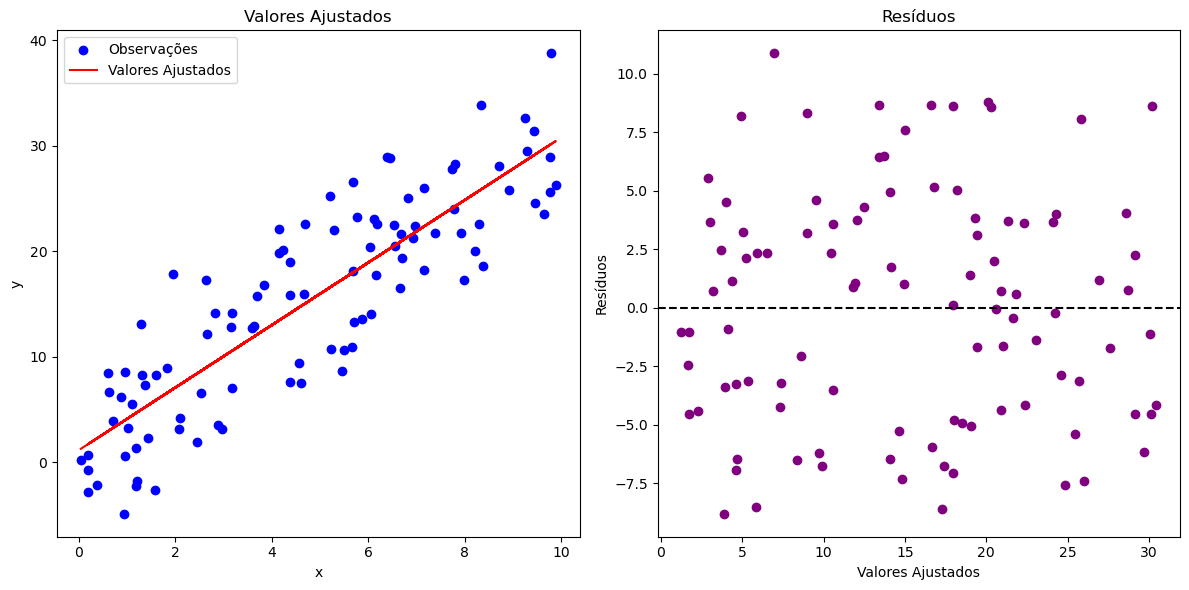

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerando dados de exemplo
np.random.seed(0)
x = np.random.rand(100) * 10  # 100 observações de x
y = 3 * x + np.random.randn(100) * 5  # y com ruído

# Criando um DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Adicionando uma constante para o intercepto
X = sm.add_constant(data['x'])

# Ajustando o modelo de regressão linear
model = sm.OLS(data['y'], X).fit()

# Obtendo valores ajustados e resíduos
data['y_hat'] = model.predict(X)  # Valores ajustados
data['residuals'] = data['y'] - data['y_hat']  # Resíduos

# Exibindo resultados
print(model.summary())

# Plotando os valores ajustados e os resíduos
plt.figure(figsize=(12, 6))

# Gráfico de dispersão com valores ajustados
plt.subplot(1, 2, 1)
plt.scatter(data['x'], data['y'], label='Observações', color='blue')
plt.plot(data['x'], data['y_hat'], label='Valores Ajustados', color='red')
plt.title('Valores Ajustados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Gráfico de resíduos
plt.subplot(1, 2, 2)
plt.scatter(data['y_hat'], data['residuals'], color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gerando dados de exemplo
np.random.seed(0)
x = np.random.rand(100) * 10  # 100 observações de x
y = 3 * x + np.random.randn(100) * 5  # y com ruído

# Criando um DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Adicionando uma constante para o intercepto
X = sm.add_constant(data['x'])

# Ajustando o modelo de regressão linear
model = sm.OLS(data['y'], X).fit()

# Obtendo valores ajustados e resíduos
data['y_hat'] = model.predict(X)  # Valores ajustados
data['residuals'] = data['y'] - data['y_hat']  # Resíduos

# Selecionando as colunas para a tabela
result_table = data[['y', 'y_hat', 'residuals']]

# Exibindo a tabela
print(result_table.head())


           y      y_hat  residuals
0  10.638656  17.402106  -6.763450
1  25.959813  22.340919   3.618894
2  20.411213  19.003590   1.407623
3   8.665277  17.285436  -8.620159
4  20.150905  13.686810   6.464094


## Gráfico valores Previstos e Observados

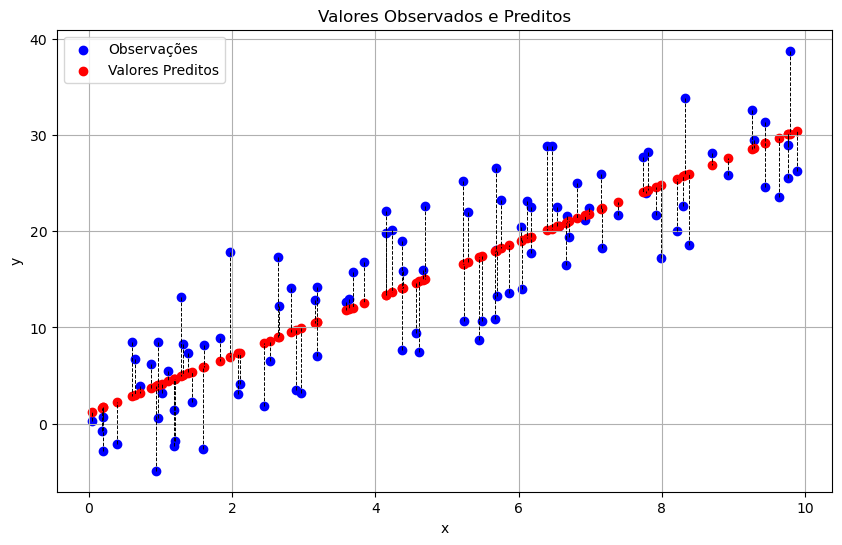

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerando dados de exemplo
np.random.seed(0)
x = np.random.rand(100) * 10  # 100 observações de x
y = 3 * x + np.random.randn(100) * 5  # y com ruído

# Criando um DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Adicionando uma constante para o intercepto
X = sm.add_constant(data['x'])

# Ajustando o modelo de regressão linear
model = sm.OLS(data['y'], X).fit()

# Obtendo valores ajustados
data['y_hat'] = model.predict(X)  # Valores ajustados

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], label='Observações', color='blue')
plt.scatter(data['x'], data['y_hat'], label='Valores Preditos', color='red')

# Conectando os pontos observados e ajustados
for i in range(len(data)):
    plt.plot([data['x'].iloc[i], data['x'].iloc[i]], [data['y'].iloc[i], data['y_hat'].iloc[i]], 'k--', lw=0.7)

plt.title('Valores Observados e Preditos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
